In [0]:
#J.Czaja, nr indexu 5954, st. zaoczne WSIZ
#POBIERAMY BIBLIOTEKI
#ZAD 1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Wczytaj przykładowy zbiór danych - dane dotyczące trzech gatunków Irysów
iris = datasets.load_iris()
#po przeksztalceniu na pande mozemy generowac nazwy kolumn odpowiednimi komendami
df = pd.DataFrame(iris.data, columns=iris.feature_names)

#print(iris.groupby('class').size())
#rodzaj danych zbioru irysa
df.info()
#wykaz wartosci zbioru irysa w 10 rekordach
df.head(10)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [0]:
#podstawowe statystyki zbioru irysa
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [0]:

print("------------------target------------------------------")

# dane mamy w zbiorze
print('Elementy zbioru: ', list(iris.keys()))

#  elementy zbioru
print('Typ pierwszego elementu z \'data\': ', type(iris['data'][0]))
print('Kilka pierwszych elementów:')
print(iris['data'][0:5])

# Kwiaty mają swoje etykiety numeryczne...
print('Pierwszy kwiat w zbiorze to: ', iris['target'][0])

# ... a odpowiadające im nazwy są osobno
print('Pierwszy kwiat w zbiorze (słownie) to: ', iris['target_names'][0])

# Etykiety które występują
print('Cechy irysów w zbiorze to: ', iris['feature_names'])

------------------target------------------------------
Elementy zbioru:  ['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
Typ pierwszego elementu z 'data':  <class 'numpy.ndarray'>
Kilka pierwszych elementów:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Pierwszy kwiat w zbiorze to:  0
Pierwszy kwiat w zbiorze (słownie) to:  setosa
Cechy irysów w zbiorze to:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [0]:
# INNE Etykiety które występują
print('zrodlo i nazwa pobranego pliku zbioru irysa: ', iris['filename'])

print("------------------target------------------------------")
# Etykiety które występują
print('Wydruk opisu zbioru ', iris['target'])




xrodlo i nazwa pobranego pliku zbioru irysa:  /usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/iris.csv
----------------------------------------------------------
Wydruk opisu zbioru  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [0]:
print("------------------------DESCR----------------------------------")
# INNE Etykiety które występują
print('Wydruk opisu zbioru ', iris['DESCR'])

------------------------DESCR----------------------------------
Wydruk opisu zbioru  .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   

In [0]:
# Zestaw danych  irysa składa się z:

#Zbiór danych o kwiatach to wielowymiarowy zbiór danych wprowadzony przez brytyjskiego statystyka
# i biologa Ronalda Fishera w 1936 r. z zastosowaniem wielu pomiarów w problemach taksonomicznych.
#  Jest on czasem nazywane zestawem danych Iris Andersona, ponieważ Edgar Anderson zebrał dane
#   w celu kwantyfikacji zmienności morfologicznej kwiatów Iris trzech powiązanych gatunków. 
#   Zestaw danych składa się z 50 próbek z każdego z trzech gatunków (Iris Setosa, Iris virginica
# i Iris versicolor), lacznie ze 150. Z każdej próbki zmierzono cztery cechy: długość i szerokość płatków i płatków, w centymetrach.
#Zestaw ten danych stał się typowym przypadkiem testowym dla wielu technik klasyfikacji statystycznej w uczeniu maszynowym.

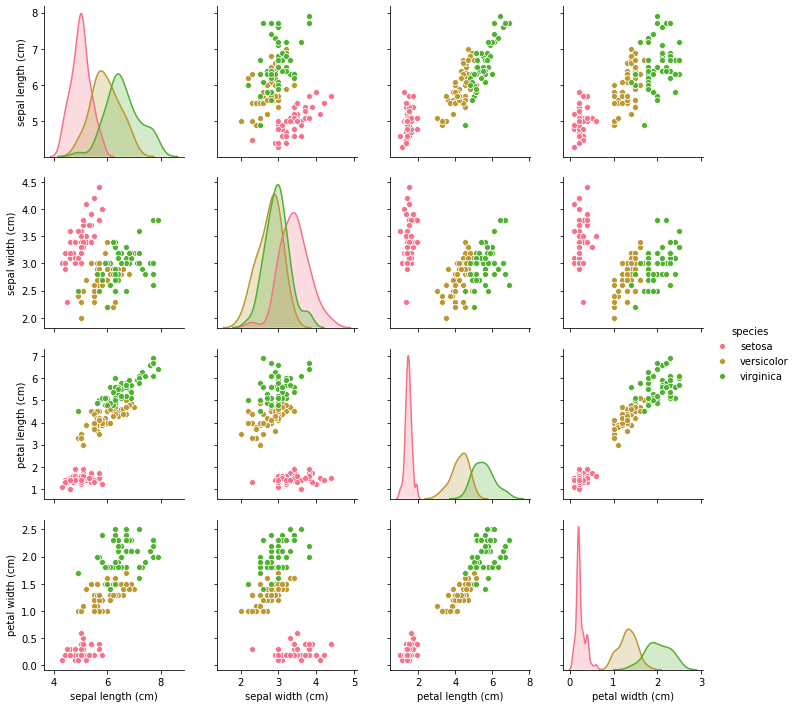

NameError: ignored

In [0]:
#POBIERAMY BIBLIOTEKI

import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# wykresy będą tworzone przy pomocy pakietu seaborn
import seaborn as sns

# konwersja na obiekt pandas.DataFrame
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

# funkcja która nam zamieni wartości 0, 1, 2 na pełny opis tekstowy dla gatunku
targets = map(lambda x: iris['target_names'][x], iris['target'] )

# doklejenie informacji o gatunku do reszty dataframe
iris_df['species'] = np.array(list(targets))


# wykres
sns.pairplot(iris_df, hue='species')
plt.show()

tmp = data.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

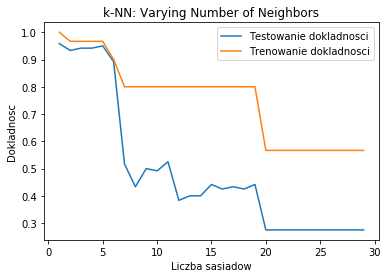

In [0]:
#ZAD 2
#POBIERAMY BIBLIOTEKI

from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
 
liczba_sasiadow_opis = 'Liczba sasiadow'
dokladnosci_skoringu_opis = 'Dokladnosc scoringu'

#file_name_for_chart = "Lab2_Exercise2_LiczbaSasiadow_Dokladnosc.png"
#file_name_for_chart2 = "Lab2_Exercise3_Wina.png"
#
# Wczytaj przykładowy zbiór danych - dane dotyczące trzech gatunków Irysów
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.8)
 
# Setup arrays to store train and test accuracies
#Ustawianie tablicy dla zbioru dokładności trenowania i testowania

neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Klasyfikator k-NN z libcza k sasiadow
    knn = KNeighborsClassifier(n_neighbors=k)

    # Dopasowaenie klasyfikator do danych treningowych
    knn.fit(X_train2, y_train2)
    
    #Obliczanie dokładności na zestawie treningowym
    train_accuracy[i] = knn.score(X_train2, y_train2)

    #Obliczanie dokładności na zestawie testowym
    test_accuracy[i] = knn.score(X_test2, y_test2)

# Rysowanie wykresow
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testowanie dokladnosci')
plt.plot(neighbors, train_accuracy, label = 'Trenowanie dokladnosci')
plt.legend()
plt.xlabel('Liczba sasiadow')
plt.ylabel('Dokladnosc')
plt.show()

In [0]:
#ZAD 3
#POBIERAMY BIBLIOTEKI

import pandas as pd
import seaborn as sns
sns.set_palette('husl')
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

In [4]:
#pobranie zbioru danych winach i ich cechach
wines = load_wine()

#konwersja danych na pande
df = pd.DataFrame(wines['data'], columns=wines['feature_names'])

#wykaz kolumn zbioru
df.columns


Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [5]:
 # Zobaczmy jakie dane mamy w zbiorze
print('Elementy zbioru win: ', list(wines.keys()))
# Etykiety które występują
print('Cechy win w zbiorze to: ', wines['feature_names'])
 


Elementy zbioru win:  ['data', 'target', 'target_names', 'DESCR', 'feature_names']
Cechy win w zbiorze to:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [6]:
#statystyki dotyczace alkoholu w winach
df['alcohol'].describe()

count    178.000000
mean      13.000618
std        0.811827
min       11.030000
25%       12.362500
50%       13.050000
75%       13.677500
max       14.830000
Name: alcohol, dtype: float64

In [0]:
#przygotowanie danych dla
#dff = pd.DataFrame(wines.data, columns=wines.feature_names)
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


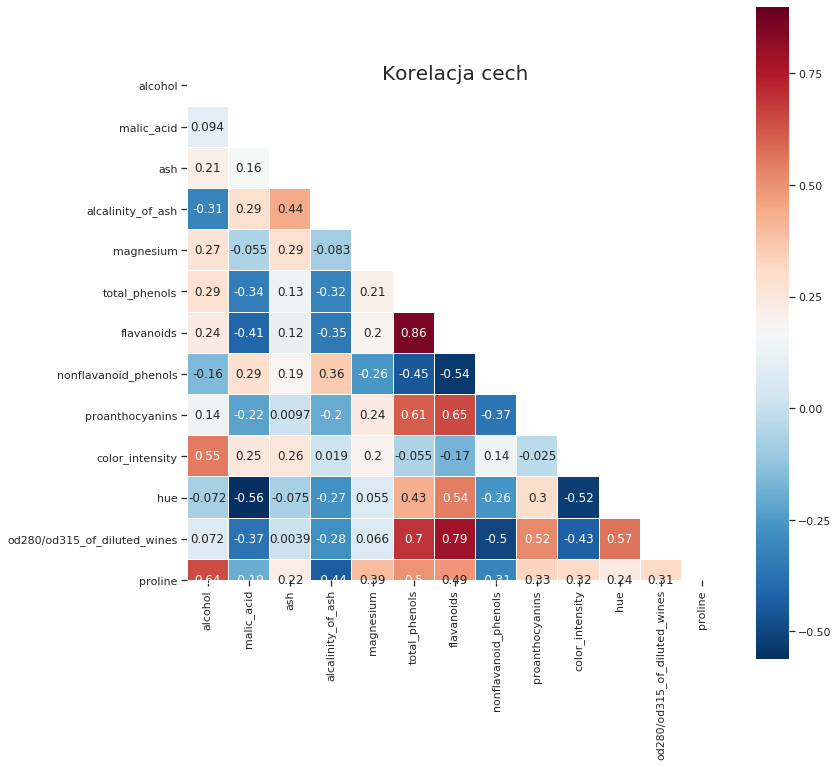

In [0]:
#generowanie wykresu korelacji
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (12,12))
sns.heatmap(df.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Korelacja cech", y = 1.03,fontsize = 20)
plt.show()

In [7]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Podziel zbiór danych na uczący i testowy.
# Podzielmy zbiór na cechy oraz etykiety
X = wines.data
y = wines.target
 
# Używamy funkcji do podzielenia zbioru na zbiór uczący i zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)
 
# Tworzymy klasyfikatory używając parametru 5 sąsiadów
knn = KNeighborsClassifier(n_neighbors = 5)
# Tworzymy inne klasyfikatory 
svc=SVC(kernel = 'rbf',gamma='scale')
naive=GaussianNB()
logr=(LogisticRegression(solver="liblinear"))
tree=DecisionTreeClassifier(criterion = "entropy")
ran=RandomForestClassifier(n_estimators=10, criterion="entropy")


# Wytrenuj klasyfikatory
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)
naive.fit(X_train, y_train)
logr.fit(X_train, y_train)
tree.fit(X_train, y_train)
ran.fit(X_train, y_train)

# Przewidujemy wartości dla zbioru testowego
# Dokonaj predykcji na zbiorze testowym
y_pred = knn.predict(X_test)
y_pred2 = svc.predict(X_test)
y_pred3 = naive.predict(X_test)
y_pred4 = logr.predict(X_test)
y_pred5 = tree.predict(X_test)
y_pred6 = ran.predict(X_test)
 
# Sprawdzamy kilka pierwszych wartości przewidzianych
print(["Wartosci przewidziane: ", y_pred[:5]])
print(["Wartosci przewidziane: ", y_pred2[:5]])
print(["Wartosci przewidziane: ", y_pred3[:5]])
print(["Wartosci przewidziane: ", y_pred4[:5]])
print(["Wartosci przewidziane: ", y_pred5[:5]])
print(["Wartosci przewidziane: ", y_pred6[:5]])

# Sprawdzamy dokładność roznych klasyfikatorow
print(["Dokładność klasyfikatora knn: ", knn.score(X_test, y_test)])
print(["Dokładność klasyfikatora svc: ", svc.score(X_test, y_test)])
print(["Dokładność klasyfikatora naive: ", naive.score(X_test, y_test)])
print(["Dokładność klasyfikatora logr: ", logr.score(X_test, y_test)])
print(["Dokładność klasyfikatora score: ", tree.score(X_test, y_test)])
print(["Dokładność klasyfikatora ran: ", ran.score(X_test, y_test)])

#  wyniki predykcji w odniesieniu do knn

y_predppp = knn.predict(X_test)
print(y_predppp)

# Jak bardzo wyniki różnią się od prawdziwych wartości?
#generujemy bardziej rozbudowane informacje w odniesieniu do knn
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



#from sklearn.metrics import classification_report, confusion_matrix


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

['Wartosci przewidziane: ', array([1, 1, 2, 2, 2])]
['Wartosci przewidziane: ', array([1, 1, 2, 2, 2])]
['Wartosci przewidziane: ', array([2, 2, 2, 1, 2])]
['Wartosci przewidziane: ', array([2, 2, 2, 1, 2])]
['Wartosci przewidziane: ', array([2, 2, 2, 1, 2])]
['Wartosci przewidziane: ', array([2, 2, 2, 1, 2])]
['Dokładność klasyfikatora knn: ', 0.7062937062937062]
['Dokładność klasyfikatora svc: ', 0.6993006993006993]
['Dokładność klasyfikatora naive: ', 0.958041958041958]
['Dokładność klasyfikatora logr: ', 0.9230769230769231]
['Dokładność klasyfikatora score: ', 0.8811188811188811]
['Dokładność klasyfikatora ran: ', 0.9440559440559441]
[1 1 2 2 2 1 2 0 1 0 2 0 2 2 0 1 2 2 2 2 2 1 1 1 0 2 1 1 2 2 2 1 0 2 0 2 2
 1 1 0 1 2 1 1 1 2 0 1 2 0 2 0 0 0 1 2 2 0 2 0 0 0 1 0 0 0 0 0 2 1 1 0 1 0
 1 1 2 1 0 1 0 2 0 2 2 1 0 1 2 1 2 1 2 2 0 1 1 1 0 1 2 0 1 2 0 2 2 2 2 2 0
 0 2 1 1 0 2 2 2 2 2 0 2 0 2 1 0 2 2 0 2 1 0 0 0 0 1 0 1 2 2 0 0]
0.7062937062937062
              precision    recall  f1-score 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
